# Project 2a_Housing Case Study (Multiple Linear Regression)

## Problem Statement:

## Importing the dataset

In [2]:
import pandas as pd
import numpy as np

# importing housing dataset
housing = pd.read_csv(r"C:\Users\royim\OneDrive\Desktop\Udemy Courses_Practice\Kaggle Master\Project 2_Multiple Linear Regression\Multplr_LR_Code_for Udemy\Housing.csv")
housing.head()
housing.tail()
housing.info()
housing.shape
housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## We need to work on converting non-numeric values into numeric so that it can be used in our model

## Data Prepartion
* You can see that your dataset has many columns with values as 'Yes' or 'No'
* We need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'

In [3]:
# Converting Yes to 1 and No to 0
housing['mainroad'] = housing['mainroad'].map({'yes':1, 'no':0})
housing['guestroom'] = housing['guestroom'].map({'yes':1, 'no':0})
housing['basement'] = housing['basement'].map({'yes':1, 'no':0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes':1, 'no':0})
housing['airconditioning'] = housing['airconditioning'].map({'yes':1, 'no':0})
housing['prefarea'] = housing['prefarea'].map({'yes':1, 'no':0})

In [4]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


### The "furnishingstatus" has more than 2 categorical values, so we can not use 0 and 1 for this. 
### It has 3 levels which needs to be converted into an integer.

In [5]:
# Creating a dummy variable for 'furnishingstatus'
status = pd.get_dummies(housing['furnishingstatus'],drop_first=True,dtype=int)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [6]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [7]:
# Adding the results to the master dataframe
housing = pd.concat([housing, status], axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [8]:
# Dropping "furnishingstatus" column
housing.drop(['furnishingstatus'], axis=1, inplace=True)

In [9]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


## Creating a new variable (Derived Columns)

In [10]:
# Let us create the new metric and assign it to a "area_per_bedroom"
housing['areaperbedroom']=housing['area']/housing['bedrooms']
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0


In [11]:
# Metric: bathrooms per bedroom
housing['bbratio'] = housing['bathrooms']/housing['bedrooms']
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


## Rescaling

## Splitting the Data into Training and Testing Sets

In [12]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [13]:
# Putting feature variable into X
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio']]

# Putting response variable into y
y = housing['price']

In [14]:
# random_state is the seed used by the random number generator, it can be any interger
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

## Building a linear Model

In [15]:
import statsmodels.api as sm       # Importing statsmodels
X_train = sm.add_constant(X_train) # Adding a constant column to our dataframe
lm_1 = sm.OLS(y_train, X_train).fit()

In [16]:
# Lets see the summary of our firat linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.12
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           4.56e-82
Time:                        12:19:37   Log-Likelihood:                -5811.5
No. Observations:                 381   AIC:                         1.165e+04
Df Residuals:                     365   BIC:                         1.172e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6.585e+05   7.13e+05     

#### From above chart, it is observed the "coef" column apart from area all are very high. This is due to
#### one value is very high while other value is very low. To avoid that need to do either
#### a) Standadization, b) Scale of 0 and 1

## Rescaling the Features

###### It is extreamly important to rescale the variables so that they have a comparable scale.
###### There are two ways of rescaling.
###### 1. Normalization (min-max scaling) and
###### 2. standardisation (mean-0, sigma-1) 
###### Lets try Normalization. Normalization will range b/w 0 and 1.

In [17]:
# Defining a normalization function
def normalize(x):
    return((x-np.min(x))/(max(x) - min(x)))
    
# applying normalize() to all columns
housing = housing.apply(normalize)

In [18]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0,0.237016,0.4
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.298923,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0,0.472584,0.6
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.240232,0.4
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.237016,0.1


## Again Splitting the Data into Training and Testing Sets

In [19]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [20]:
# Putting feature variable into X
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio']]

# Putting response variable into y
y = housing['price']

In [21]:
# random_state is the seed used by the random number generator, it can be any interger
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

## Building a linear Model

In [22]:
import statsmodels.api as sm       # Importing statsmodels
X_train = sm.add_constant(X_train) # Adding a constant column to our dataframe
lm_1 = sm.OLS(y_train, X_train).fit()

In [23]:
# Lets see the summary of our firat linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.12
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           4.56e-82
Time:                        12:19:37   Log-Likelihood:                 384.40
No. Observations:                 381   AIC:                            -736.8
Df Residuals:                     365   BIC:                            -673.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0603      0.059     

## Multi-colinearity can be solved using VIF (Various Inflation Factors)

## Checking VIF

In [24]:
# UDF for calcualting vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame(columns=['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0, xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [25]:
# Calcualting Vif value
vif_cal(input_data=housing, dependent_col="price")

,Var,Vif
13,areaperbedroom,68.71
0,area,57.52
14,bbratio,29.25
2,bathrooms,11.11
1,bedrooms,10.68
4,mainroad,7.91
3,stories,2.81
11,semi-furnished,2.61
12,unfurnished,2.38
6,basement,2.05


## Instead of removing (based on VIF>5 and p>0.05) columns one by one, we can automate this using RFE (Recursive Feature Elemination)

## RFE

In [28]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [33]:
# Running RFE with the output number of the variable equal to 9
lm = LinearRegression()
# rfe = RFE(lm, 9)        # running RFE # Not working 
rfe = RFE(estimator=lm, n_features_to_select=9)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

[False  True False  True  True  True False False  True  True False  True
 False False  True  True]
[8 1 3 1 1 1 4 6 1 1 2 1 7 5 1 1]


In [34]:
col = X_train.columns[rfe.support_]

In [35]:
col

Index(['area', 'bathrooms', 'stories', 'mainroad', 'hotwaterheating',
       'airconditioning', 'prefarea', 'areaperbedroom', 'bbratio'],
      dtype='object')

## Building model using sklearn

In [36]:
# Creating X_test dataframe with RFE selected variable
X_train_rfe = X_train[col]

In [38]:
# Adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [39]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [40]:
# Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     80.14
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           1.88e-81
Time:                        12:47:14   Log-Likelihood:                 369.54
No. Observations:                 381   AIC:                            -719.1
Df Residuals:                     371   BIC:                            -679.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0139      0.021     

In [46]:
# Calculating Vif value
vif_cal(input_data=housing.drop(['bedrooms','bathrooms','areaperbedroom','guestroom','basement','parking', 'semi-furnished', 'unfurnished'], axis=1), dependent_col="price")

,Var,Vif
2,mainroad,5.10
0,area,3.99
6,bbratio,3.15
1,stories,2.02
4,airconditioning,1.72
5,prefarea,1.42
3,hotwaterheating,1.07


In [45]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

## Making Predictions

In [47]:
# Now let's use our model to make predictions

# Creating X_test_6 dataframe by dropping variables from X_test
X_test_rfe = X_test[col]

# Adding a constant variable
X_test_rfe = sm.add_constant(X_test_rfe)

# Kaing predictions
y_pred = lm.predict(X_test_rfe)

## Model Evaluation

In [48]:
# Now let's check how well our model is able to make predictions

# Importing the required libraries for plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Housing Price')

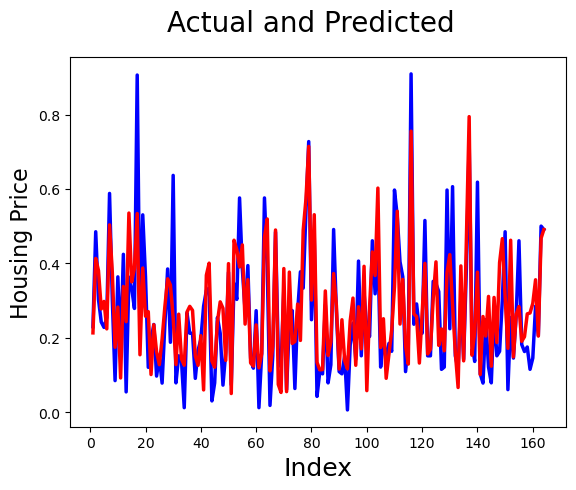

In [50]:
# Actual and Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,165,1)]  # Generatinf Index
fig = plt.figure()
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-') # Plotting Actual
plt.plot(c, y_pred, color='red',  linewidth=2.5, linestyle='-') #Plotting Predicted
fig.suptitle('Actual and Predicted', fontsize=20)                 # Plot Heading
plt.xlabel('Index', fontsize=18)                                  # X-label
plt.ylabel('Housing Price', fontsize=16)                          # Y-label


## Error Terms

Text(0, 0.5, 'ytest-ypred')

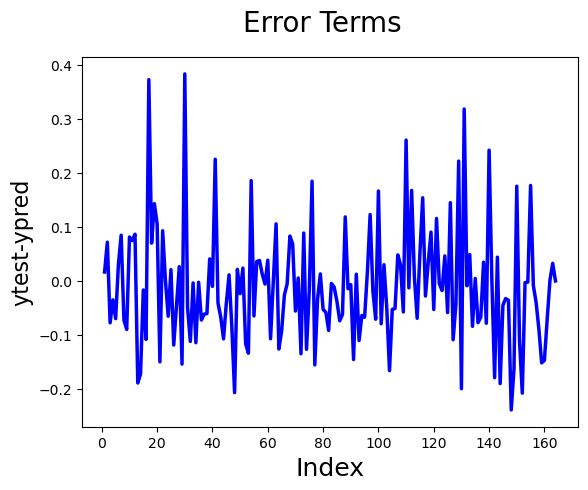

In [53]:
import matplotlib.pyplot as plt
c = [i for i in range(1,165,1)]
fig = plt.figure()
plt.plot(c, y_test-y_pred, color='blue', linewidth=2.5, linestyle='-')
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('ytest-ypred', fontsize=16)

Text(0, 0.5, 'y_pred')

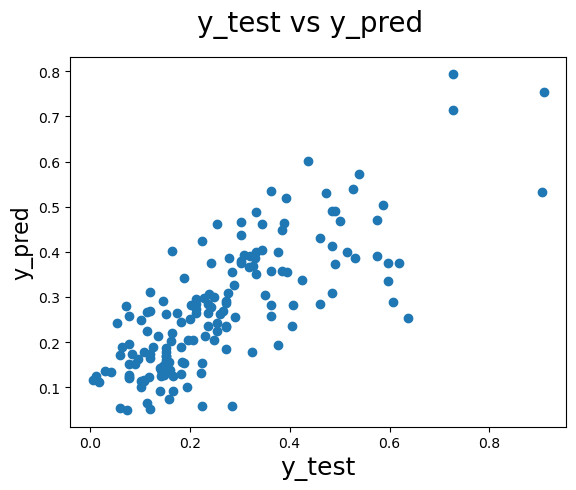

In [54]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

C:\Users\royim\AppData\Local\Temp\ipykernel_20804\3623598752.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred), bins=50)


Text(0, 0.5, 'Index')

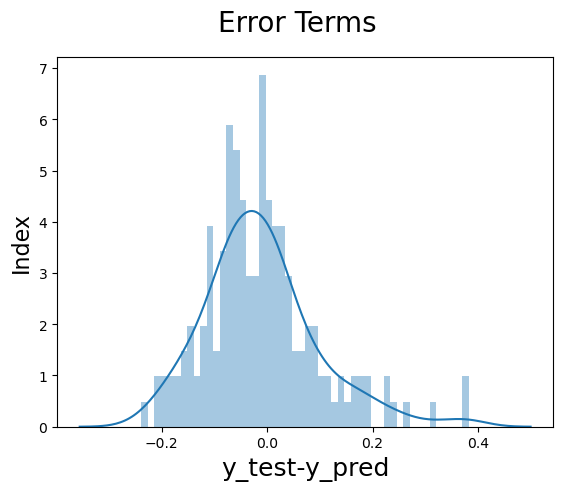

In [55]:
# Plotting the error terms to understand the distribution
fig = plt.figure()
sns.distplot((y_test-y_pred), bins=50)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('y_test-y_pred', fontsize=18)
plt.ylabel('Index', fontsize=16)

In [56]:
# Now let's check the Root Mean Square Error of our model
import numpy as np
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 0.10820352538131708


In [57]:
# Importing mean square error and r square from sklearn library
from sklearn.metrics import mean_squared_error, r2_score

# Computing mean square error and R square value
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Printing the Mean Square Error and R Square value
print('Mean_Squared_Error: ', mse)
print('r_square_value: ', r_squared)

Mean_Squared_Error:  0.01170800290494533
r_square_value:  0.6021721774706439
